# CP 218 Worksheet2: Probability Theory

Firstly we will import the relevant libraries (numpy, pandas, matplotlib, etc), ensuring our plots appear inline rather than in separate windows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline


.

In [2]:
import os
cwd = os.getcwd()
cwd

'/Users/shyam/git_projects/PML'

## Probability Theory


### Practice Questions

1. A real estate data suggests that 57% of houses in a city have garden, 52% have garage, and 14% have both. What is the probability that a house in that city

       a) a garage or a garden?  

       b) neither a garage nor a garden? 

       c) a garage but no garden?  


2.  The probabilities that an adult man has high blood pressure and/or high cholesterol are shown in the table.
 
 
                         Cholesterol   

                           High        OK
                   High    0.11       0.16
     Blood 
     Pressure
                   OK      0.21       0.52


   What's the probability that

     a) a man has high blood pressure? 

     b) a man with high blood pressure has high cholesterol?  

     c) a man has high blood pressure if it's known that he has high cholesterol?
     

### Programming 
We will take a computational approach to understand probability and some of its law. The data will be used from General Social survey to compute several propobability propositions such as:

* What is the probability for a particular proposition to be true/false? 
* Conjunction: What is the probability that two propositions are both true. 
* Conditional probability, What is the probability that one proposition is true, given that another is true.

In [3]:
#load the data
gss = pd.read_csv('gss_survey_data.csv', index_col=0)

In [4]:
gss.shape

(49290, 6)

In [4]:
gss.head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0


In [ ]:
gss.columns

The columns are

* `caseid`: Respondent id (which is the index of the table).

* `year`: Year when the respondent was surveyed.

* `age`: Respondent's age when surveyed.

* `sex`: Male or female.

* `polviews`: Political views on a range from liberal to conservative.

* `partyid`: Political party affiliation, Democrat, Independent, or Republican.

* `indus10`: [Code](https://www.census.gov/naics/) for the industry the respondent works in.

Let's look at these variables in more detail, starting with `indus10`.

In [5]:
gss.describe()

,year,age,sex,polviews,partyid,indus10
count,49290.000000,49290.000000,49290.000000,49290.000000,49290.000000,49290.000000
mean,1995.364050,46.143132,1.537858,4.105052,2.753905,5993.666504
std,12.336592,17.111420,0.498570,1.377160,2.048108,2796.295069
min,1974.000000,18.000000,1.000000,1.000000,0.000000,170.000000
25%,1985.000000,32.000000,1.000000,3.000000,1.000000,3890.000000
50%,1996.000000,44.000000,2.000000,4.000000,3.000000,6990.000000
75%,2006.000000,59.000000,2.000000,5.000000,5.000000,8190.000000
max,2016.000000,89.000000,2.000000,7.000000,7.000000,9870.000000


Let's compute probability for some propositions from Banking. The code for "Banking and related activities" is 6870.

`Question 1: If we choose a random person from the dataset, what is the probability they are a banker?`

In [6]:
banker = (gss['indus10'] == 6870)
banker.head()

caseid
1    False
2    False
5    False
6     True
7    False
Name: indus10, dtype: bool

Let's find how many times each value appears.

In [7]:
banker.value_counts(dropna=False).sort_index()

False    48562
True       728
Name: indus10, dtype: int64

In [8]:
#Compute the probability for a chosen random person to be a banker.

banker.mean()

0.014769730168391155

`Question 2: If we choose a random person from the dataset, what is the probability they are a female?`

The values of the column `sex` are encoded like this:

```
1    Male
2    Female
```

In [9]:
# ..... solution goes here
female = (gss['sex'] == 2)
female.mean()

0.5378575776019476

`Question 3: If we choose a random person in this dataset, what is the probability they are liberal.`

The values of `polviews` are on a seven-point scale:


1	Extremely liberal

2	Liberal

3	Slightly liberal

4	Moderate

5	Slightly conservative

6	Conservative

7	Extremely conservative


We will consider `liberal` to be `True` for anyone whose response is "Extremely liberal", "Liberal", or "Slightly liberal"

In [ ]:
gss['polviews'].value_counts(dropna=False).sort_index()

In [12]:
liberal = (gss['polviews'] < 4)
liberal.mean()

0.27374721038750255

Let's define a function that takes a Boolean series and returns a probability:

In [10]:
def prob(A):
    """Computes the probability of a proposition, A.
    
    A: Boolean series
    
    returns: probability
    """
    assert isinstance(A, pd.Series)
    assert A.dtype == 'bool'
    
    return A.mean()

In [13]:
#verify if the function is behaving correct.
prob(liberal)

0.27374721038750255

`Question 4: If we choose a random person from the dataset, what is the probability they are a democrat?`

 The values of `partyid` are encoded like this:

```
0	Strong democrat
1	Not str democrat
2	Ind,near dem
3	Independent
4	Ind,near rep
5	Not str republican
6	Strong republican
7	Other party
```

We will consider `democrat` to include respondents who chose "Strong democrat" or "Not str democrat":

In [14]:
# compute probability 
# .....   solution goes here.
democrat = (gss['partyid'] <= 1)
prob(democrat)


0.3662609048488537

### Conjunction

Now that we have a defined a function to compute probability, let's move on to conjunction.

"Conjunction" is another name for the logical `and` operation.  If you have two propositions, `A` and `B`, the conjunction `A and B` is `True` if both `A` and `B` are `True`, and `False` otherwise.

 Use `prob` and the `&` operator to compute the following probabilities.
 

* Q5: What is the probability that a random respondent is a banker and liberal?

* Q6: What is the probability that a random respondent is female, a banker, and liberal?

* Q7: What is the probability that a random respondent is female, a banker, and a liberal Democrat?
 

In [15]:
 #Solution for Q5 goes here
prob(banker & liberal)

0.003306958815175492

In [16]:
 #Solution for Q6 goes here
prob(female & banker & liberal)

0.002556299452221546

In [17]:
 #Solution for Q7 goes here
prob(female & banker & liberal & democrat)

0.0012375735443294787

`Q8: Is the conjunction have commutative property?`

In [21]:
# Solution for Q8 goes here
print(prob(banker & liberal))
print(prob(liberal & banker))

0.003306958815175492
0.003306958815175492


### Conditional probability

* Q9: What is the probability that a respondent is a Democrat, given that they are liberal?

* Q10: What is the probability that a respondent is female, given that they are a banker?

* Q11: What is the probability that a respondent is liberal, given that they are female?


In [22]:
selected = democrat[liberal]
prob(selected)

0.5206403320240125

Write a function with name `conditional` to take two Boolean series, `A` and `B`, and compute the conditional probability of `A` given `B`:


In [23]:
#solution goes here
def conditional(A, B):
    """Conditional probability of A given B.
    
    A: Boolean series
    B: Boolean series
    
    returns: probability
    """
    return prob(A[B])

In [24]:
conditional(democrat, liberal)

0.5206403320240125

In [25]:
  #solution for Q10 goes here
conditional(female, banker)

0.7706043956043956

In [ ]:
  #solution for Q11 goes here
conditional(liberal, female)

`Q 12: Is conditional probability commutative?`

In [ ]:
#solution for Q12 goes here
conditional(banker,female)
conditional(female, banker)

`Q: 13 Compute the probability a respondent is female, given that they are a liberal Democrat.`

In [ ]:
#solution for Q13 goes here
conditional(female, liberal & democrat)

`Q 14: What fraction of female bankers are liberal Democrats?`

In [26]:
#solution for Q14 goes here
conditional(liberal & democrat, female & banker)

0.10873440285204991

# More propositions

Now, we'll derive three relationships between conjunction and conditional probability:

* Theorem 1: Using conjunction to compute a conditional probability, 
$P(A|B) = \frac{P(A~\mathrm{and}~B)}{P(B)}$


* Theorem 2: Using a conditional probability to compute a conjunction, 
$P(A~\mathrm{and}~B) = P(B) P(A|B)$


* Theorem 3: Using `conditional(A, B)` to compute `conditional(B, A)`, $P(A|B) = \frac{P(A) P(B|A)}{P(B)}$
  (Bayes's Theorem)


We will validate above relationships with some example. 




    
` Q15: Verify Theorem 1 by checking what fraction of builders are male`

The industry code (`indus10` ) for "Construction" is 770. 

In [27]:
#solution for Q15 
male = (gss['sex']==1)
prob(male)

builder = (gss['indus10'] == 770)

prob(builder)


0.05978900385473727

In [28]:
print(conditional(male, builder))
print(prob(male & builder) / prob(builder))

0.8920936545639634
0.8920936545639634


 `Q16: Verify Theorem 2 by checking the fraction of respondents who are conservative republican`
 
Consider "Strong Republican" and "Not Strong Republican" as Republicans, and 

Consider "Slightly Conservative","Conservative" and "Extemely Conservative" as Conservative.

Hint: The `isin` function checks whether values are in a given sequence

In [ ]:
#Solution for Q16 goes here

conservative = (gss['polviews'] > 4)
prob(conservative)

republican= (gss['partyid'].isin([5,6]))
prob(republican)


prob(conservative & republican)
prob(republican) * conditional(conservative, republican)

 `Q17: Verify Theorem 3 by computing the fraction of builders who are liberal`

In [ ]:
#Solution for Q17 goes here
conditional(liberal, builder)
prob(liberal) * conditional(builder, liberal) / prob(builder)

# Joint, Marginals, and Conditional Probability 

Now we will take a step toward multivariate distributions, starting with two variables. We will use contingency tabke (cross-tabulation) to compute a joint distribution, then use the joint distribution to compute conditional distributions and marginal distribution.

Lets generate a dataset of colors and fruits.

In [29]:
colors = ['red', 'yellow', 'green']
fruits = ['apple', 'banana', 'grape']

Now lets take a random sample of 100 fruits.

In [30]:
np.random.seed(2)
fruit_sample = np.random.choice(fruits, 100, replace=True)
fruit_sample

array(['apple', 'banana', 'apple', 'grape', 'grape', 'apple', 'grape',
       'banana', 'banana', 'grape', 'apple', 'apple', 'apple', 'banana',
       'grape', 'apple', 'grape', 'grape', 'grape', 'banana', 'grape',
       'apple', 'banana', 'apple', 'apple', 'grape', 'grape', 'banana',
       'grape', 'apple', 'apple', 'grape', 'apple', 'grape', 'apple',
       'grape', 'banana', 'grape', 'apple', 'grape', 'banana', 'grape',
       'banana', 'banana', 'apple', 'banana', 'grape', 'apple', 'grape',
       'banana', 'banana', 'banana', 'banana', 'grape', 'apple', 'grape',
       'grape', 'apple', 'apple', 'grape', 'grape', 'apple', 'apple',
       'grape', 'grape', 'apple', 'grape', 'apple', 'banana', 'grape',
       'banana', 'grape', 'grape', 'grape', 'apple', 'grape', 'banana',
       'apple', 'apple', 'banana', 'banana', 'grape', 'banana', 'banana',
       'banana', 'banana', 'grape', 'apple', 'grape', 'grape', 'apple',
       'banana', 'grape', 'apple', 'grape', 'apple', 'apple', 'ba

Similartly, now lets take a random sample of colors.

In [31]:
color_sample = np.random.choice(colors, 100, replace=True)
color_sample

array(['red', 'red', 'green', 'green', 'yellow', 'yellow', 'green',
       'yellow', 'green', 'red', 'green', 'yellow', 'red', 'green', 'red',
       'green', 'red', 'green', 'yellow', 'red', 'red', 'green', 'green',
       'yellow', 'yellow', 'yellow', 'green', 'yellow', 'green', 'red',
       'yellow', 'red', 'red', 'green', 'yellow', 'green', 'green',
       'green', 'red', 'red', 'yellow', 'green', 'green', 'yellow',
       'green', 'yellow', 'yellow', 'red', 'yellow', 'red', 'green',
       'red', 'yellow', 'yellow', 'red', 'yellow', 'red', 'green',
       'yellow', 'yellow', 'yellow', 'green', 'red', 'green', 'red',
       'red', 'green', 'yellow', 'yellow', 'red', 'yellow', 'yellow',
       'yellow', 'red', 'green', 'red', 'green', 'red', 'red', 'green',
       'red', 'red', 'red', 'green', 'yellow', 'yellow', 'green', 'green',
       'yellow', 'yellow', 'green', 'yellow', 'yellow', 'red', 'red',
       'green', 'yellow', 'red', 'yellow', 'red'], dtype='<U6')

Can we see the distribution (probability mass function) on fruits and colours?

In [32]:
def pmf_from_seq(seq):
    """Make a PMF from a sequence of values.
    
    seq: sequence
    
    returns: Series representing a PMF
    """
    pmf = pd.Series(seq).value_counts(sort=False).sort_index()
    pmf /= pmf.sum()
    return pmf

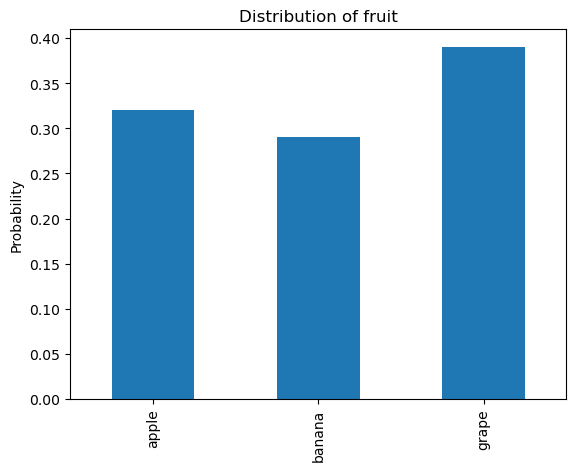

In [33]:
pmf_fruit = pmf_from_seq(fruit_sample)
pmf_fruit.plot.bar(color='C0')

plt.ylabel('Probability')
plt.title('Distribution of fruit');

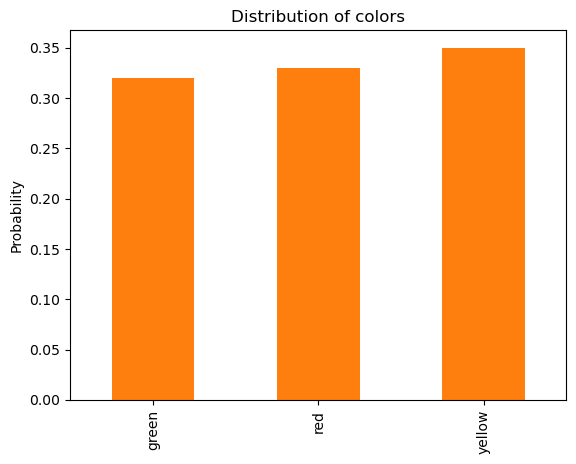

In [34]:
pmf_color = pmf_from_seq(color_sample)

pmf_color.plot.bar(color='C1')

plt.ylabel('Probability')
plt.title('Distribution of colors');

Looking at these two probability mass functions, we know the distributions of fruits, ignoring color, and we know the proportion of each color, ignoring fruit type. But if we only have the distributions and not the original data, we don't know how many apples are green, for example, or how many yellow fruits are bananas.

We can compute that information in the form of contigency table using `crosstab`, which computes the number of cases for each combination of fruit type and color.

In [35]:
contingency_table = pd.crosstab(color_sample, fruit_sample, 
                   rownames=['color'], colnames=['fruit'])
contingency_table

fruit,apple,banana,grape
color,,,
green,11,9,12
red,12,8,13
yellow,9,12,14


A contigency table (or cross tabulation) represents the "joint distribution" of two variables. 

If we normalize contingency_table so the sum of the elements is 1, the result is a joint PMF:

In [36]:
joint = contingency_table / contingency_table.to_numpy().sum()
joint

fruit,apple,banana,grape
color,,,
green,0.11,0.09,0.12
red,0.12,0.08,0.13
yellow,0.09,0.12,0.14


In this joint PMF table, each column represents the conditional distribution of color for a given fruit.

In [37]:
col = joint['apple']
col

color
green     0.11
red       0.12
yellow    0.09
Name: apple, dtype: float64

If we normalize it, we get the conditional distribution of color for a given fruit.

In [38]:
col / col.sum()

color
green     0.34375
red       0.37500
yellow    0.28125
Name: apple, dtype: float64

Lets write a function to compute conditional distribution

In [39]:
def conditional(joint, name, value):
    """Compute a conditional distribution.
    
    joint: DataFrame representing a joint PMF
    name: string name of an axis
    value: value to condition on
    
    returns: Series representing a conditional PMF
    """
    if joint.columns.name == name:
        cond = joint[value]
    elif joint.index.name == name:
        cond = joint.loc[value]
    return cond / cond.sum()

In [40]:
conditional(joint, 'fruit', 'apple')

color
green     0.34375
red       0.37500
yellow    0.28125
Name: apple, dtype: float64

Given a joint distribution, we can compute the unconditioned (marginal) distribution of either variable.

Lets compute the marginal distribution of fruit.

In [41]:
marg_fruit = joint.sum(axis=0)
marg_fruit

fruit
apple     0.32
banana    0.29
grape     0.39
dtype: float64

In [42]:
marg_color = joint.sum(axis=1)
marg_color

color
green     0.32
red       0.33
yellow    0.35
dtype: float64

Lets write a function to compute marginal distribution

In [43]:
def marginal(joint, name):
    """Compute a marginal distribution.
    
    joint: DataFrame representing a joint PMF
    name: string name of an axis
    
    returns: Series representing a marginal PMF
    """
    if joint.columns.name == name:
        return joint.sum(axis=0)
    elif joint.index.name == name:
        return joint.sum(axis=1)

In [44]:
marg_fruit = marginal(joint, 'fruit')
marg_fruit

fruit
apple     0.32
banana    0.29
grape     0.39
dtype: float64

**Exercise**:  USe GSS survey data to explore the joint distribution of two variables, `partyid` and `polviews`.

1. Make a cross tabulation of `gss['partyid']` and `gss['polviews']` and normalize it to make a joint PMF.

2. Compute the marginal distributions of `polviews`, and plot the results.

3. Compute the conditional distribution of partyid for people who identify themselves as "Extremely conservative" (`polviews`==7). How many of them are "strong Republicans" (`partyid`==6)?

In [45]:
#Solution for task 1 goes here
cross_tab = pd.crosstab(gss['partyid'], gss['polviews'])
joint_table = cross_tab / cross_tab.to_numpy().sum()
joint_table

polviews,1.0,2.0,3.0,4.0,5.0,6.0,7.0
partyid,,,,,,,
0.0,0.011016,0.038608,0.023392,0.054189,0.014912,0.013431,0.004403
1.0,0.004930,0.028505,0.036072,0.090282,0.027450,0.015825,0.003246
2.0,0.005295,0.020836,0.024244,0.050517,0.014486,0.008034,0.001907
3.0,0.003591,0.012802,0.015480,0.072449,0.018848,0.013938,0.003469
4.0,0.000913,0.004971,0.008988,0.034774,0.022642,0.017265,0.003003
5.0,0.001075,0.007324,0.013390,0.058876,0.043538,0.032786,0.004017
6.0,0.001075,0.003206,0.003855,0.018239,0.017022,0.045182,0.011422
7.0,0.001359,0.001582,0.001238,0.004991,0.002191,0.002029,0.000893


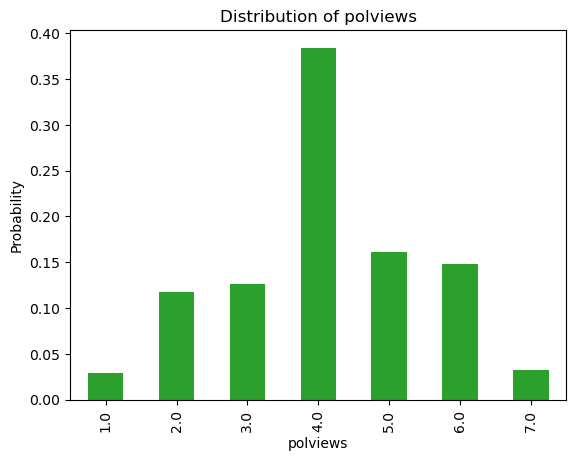

In [46]:
#Solution for task 2 goes here
marginal(joint_table, 'polviews').plot.bar(color='C2')
plt.ylabel('Probability')
plt.title('Distribution of polviews');

0.35297805642633234

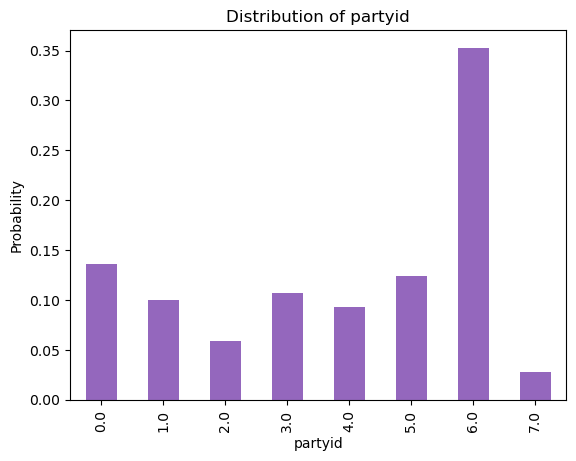

In [47]:
#Solution for task 3 goes here
cond_partyid = conditional(joint_table, 'polviews', 7)
cond_partyid.plot.bar(label='Extremely conservative', color='C4')

plt.ylabel('Probability')
plt.title('Distribution of partyid')

cond_partyid[6]

**References**:

1. Stats: Data and Models, by Deveaux, Velleman, Bock, Fourth (Global) Edition, Pearson 2016.– Chapters 1-4, 6-8, 13-14    
2. Bite Size Bayes, an introduction to probability and Bayesian statistics using Python